In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
data = pd.read_csv("result.csv")
data.head()

,n_threads,n_samples,distribution,method,time
0,1,1000000,normal,inverse cdf,0.025534
1,1,1000000,normal,accept reject,0.130152
2,2,1000000,normal,inverse cdf,0.014043
3,2,1000000,normal,accept reject,0.069549
4,4,1000000,normal,inverse cdf,0.011333


In [67]:
def speedup_plot(axis, data, distr_name = "normal", method="inverse cdf"):
    distr_df = data[data["distribution"] == distr_name]
    distr_df = distr_df[distr_df["method"] == method]
    
    single_thread_time = distr_df[distr_df["n_threads"] == 1]["time"].to_numpy()
    axis.set_title(f"{distr_name}, using {method}")
    axis.set_ylabel("Speedup")
    axis.set_xlabel("N. of samples")
    for n_thread in distr_df.n_threads.unique():
        c_df = distr_df[distr_df["n_threads"] == n_thread]
        time_df = c_df["time"].to_numpy()
        axis.plot(c_df["n_samples"], single_thread_time / time_df, label=f"N. threads: {n_thread}")
    axis.legend()
    
def time_plot(axis, data, distr_name = "normal", method="inverse cdf"):
    distr_df = data[data["distribution"] == distr_name]
    distr_df = distr_df[distr_df["method"] == method]
    
    axis.set_title(f"{distr_name}, using {method}")
    axis.set_ylabel("Time, s.")
    axis.set_xlabel("N. of samples")
    for n_thread in distr_df.n_threads.unique():
        c_df = distr_df[distr_df["n_threads"] == n_thread]
        time_df = c_df["time"].to_numpy()
        axis.plot(c_df["n_samples"], time_df, label=f"N. threads: {n_thread}")
    axis.legend()
    

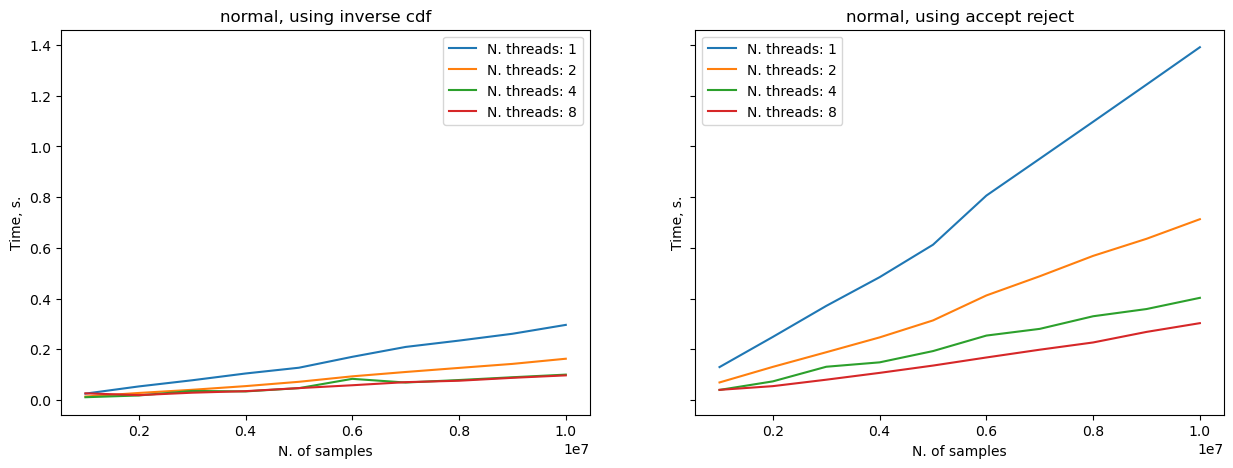

In [68]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

time_plot(axs[0], data)
time_plot(axs[1], data, method="accept reject")
plt.show()

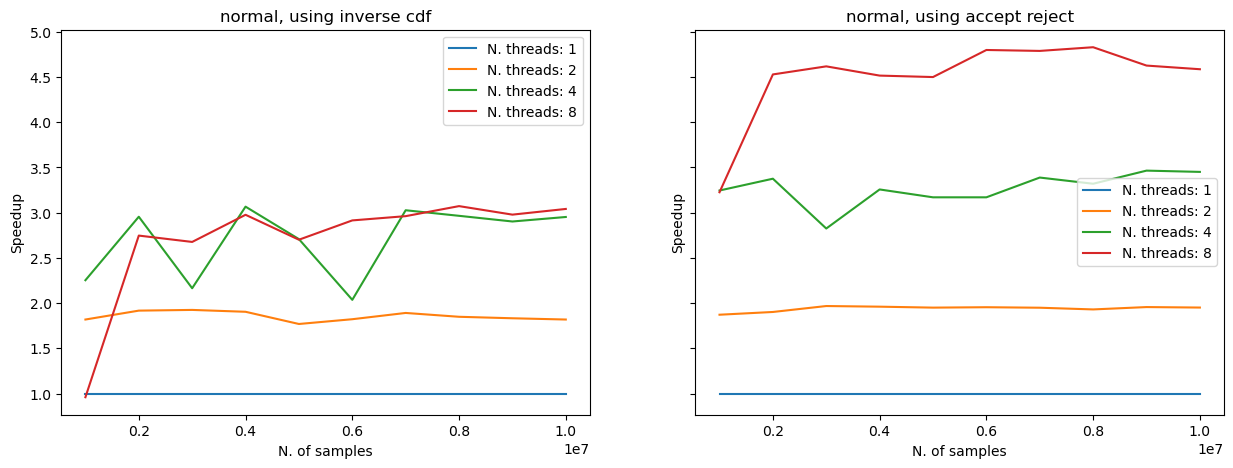

In [69]:
# speedup for normal
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)
speedup_plot(axs[0], data)
speedup_plot(axs[1], data, method="accept reject")
plt.show()

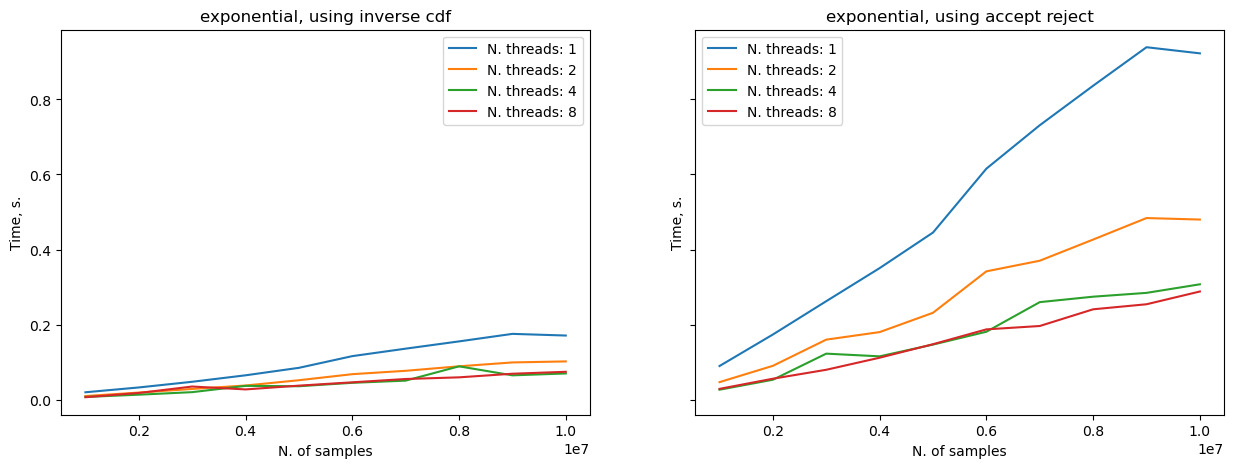

In [70]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

time_plot(axs[0], data, distr_name="exponential")
time_plot(axs[1], data, distr_name="exponential", method="accept reject")
plt.show()

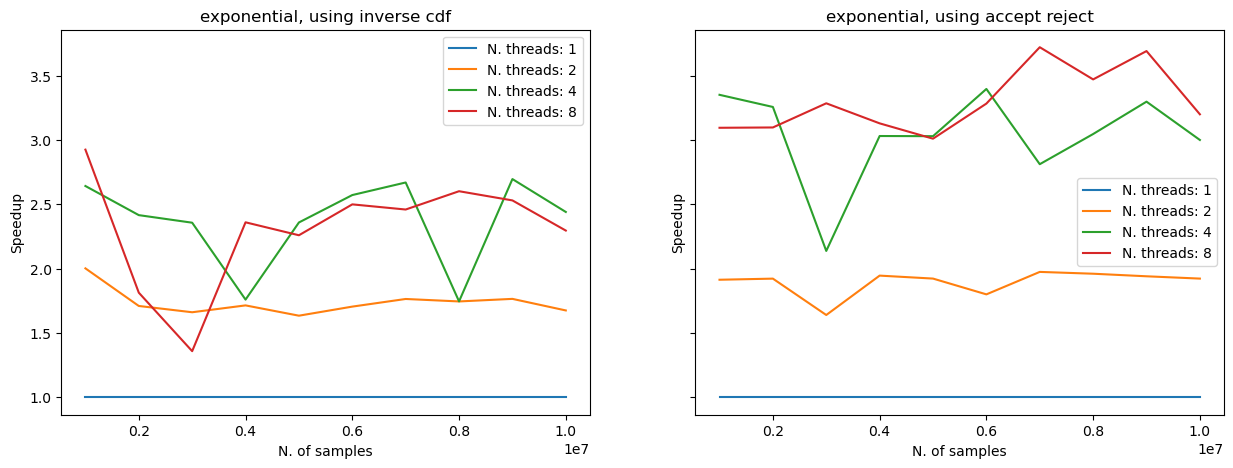

In [71]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

speedup_plot(axs[0], data, distr_name="exponential")
speedup_plot(axs[1], data, distr_name="exponential", method="accept reject")
plt.show()

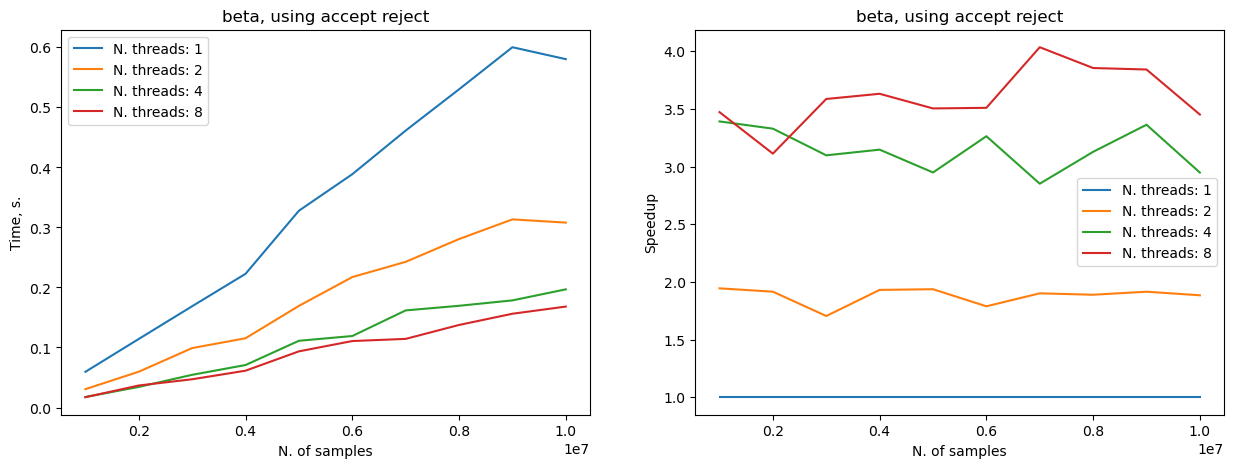

In [72]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

time_plot(axs[0], data, distr_name="beta", method="accept reject")
speedup_plot(axs[1], data, distr_name="beta", method="accept reject")
plt.show()

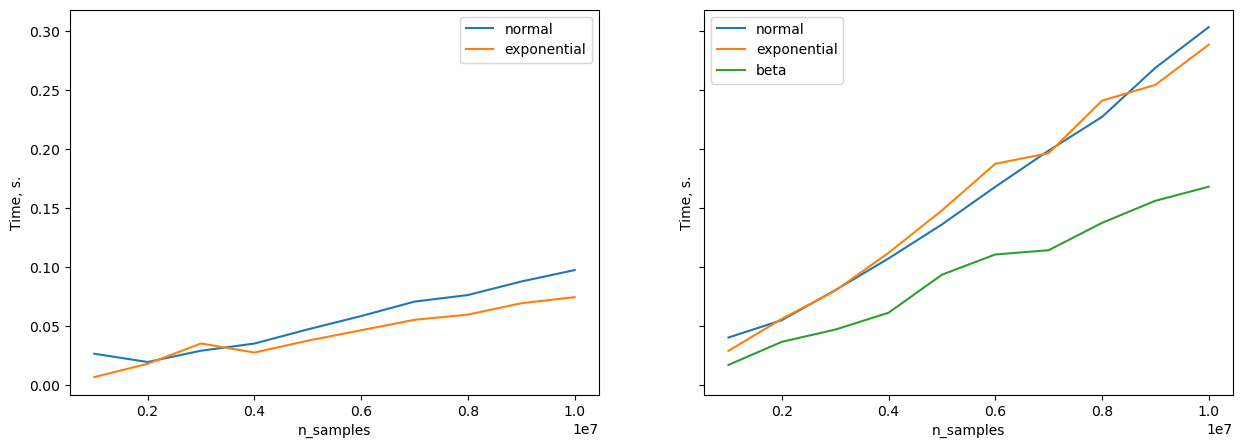

In [73]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

axs[0].set_xlabel("n_samples")
axs[0].set_ylabel("Time, s.")
axs[1].set_xlabel("n_samples")
axs[1].set_ylabel("Time, s.")

fastest_time = data[data["n_threads"] == 8]
cur_plot = fastest_time[fastest_time["distribution"] == "normal"]
cur_plot = cur_plot[cur_plot["method"] == "inverse cdf"]
axs[0].plot(cur_plot["n_samples"], cur_plot["time"], label="normal")

cur_plot = fastest_time[fastest_time["distribution"] == "exponential"]
cur_plot = cur_plot[cur_plot["method"] == "inverse cdf"]
axs[0].plot(cur_plot["n_samples"], cur_plot["time"], label="exponential")
axs[0].legend()

cur_plot = fastest_time[fastest_time["distribution"] == "normal"]
cur_plot = cur_plot[cur_plot["method"] == "accept reject"]
axs[1].plot(cur_plot["n_samples"], cur_plot["time"], label="normal")

cur_plot = fastest_time[fastest_time["distribution"] == "exponential"]
cur_plot = cur_plot[cur_plot["method"] == "accept reject"]
axs[1].plot(cur_plot["n_samples"], cur_plot["time"], label="exponential")


cur_plot = fastest_time[fastest_time["distribution"] == "beta"]
cur_plot = cur_plot[cur_plot["method"] == "accept reject"]
axs[1].plot(cur_plot["n_samples"], cur_plot["time"], label="beta")

axs[1].legend()

plt.show()

# Samples analys

In [110]:
# read data

def _to_list(s):
    # print(list(s.strip().split(","))[-1])
    return np.array(list(map(float, s.strip().split(",")[:-1])))

samples = {
    "accept_reject": {
        
    },
    "inverse_cdf": {
        
    }
}
with open("samples.txt") as fp:
    fp.readline()
    samples["inverse_cdf"]["normal"] = _to_list(fp.readline())
    fp.readline()
    samples["accept_reject"]["normal"] = _to_list(fp.readline())
    fp.readline()
    samples["inverse_cdf"]["exponential"] = _to_list(fp.readline())
    fp.readline()
    samples["accept_reject"]["exponential"] = _to_list(fp.readline())
    fp.readline()
    samples["accept_reject"]["beta"] = _to_list(fp.readline())



In [96]:
samples["accept_reject"]["normal"].shape

(10000000,)

/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

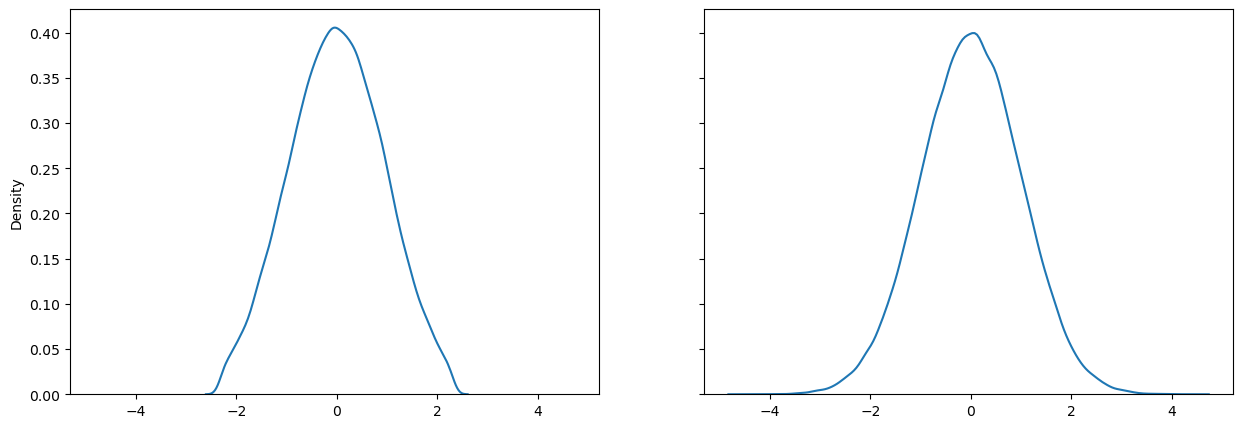

In [98]:
import seaborn as sns
fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(15, 5))

sns.kdeplot(np.random.choice(samples["accept_reject"]["normal"], size=100000, replace=False), ax=axes[0])
sns.kdeplot(np.random.choice(samples["inverse_cdf"]["normal"], size=100000, replace=False), ax=axes[1])
plt.show()

/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

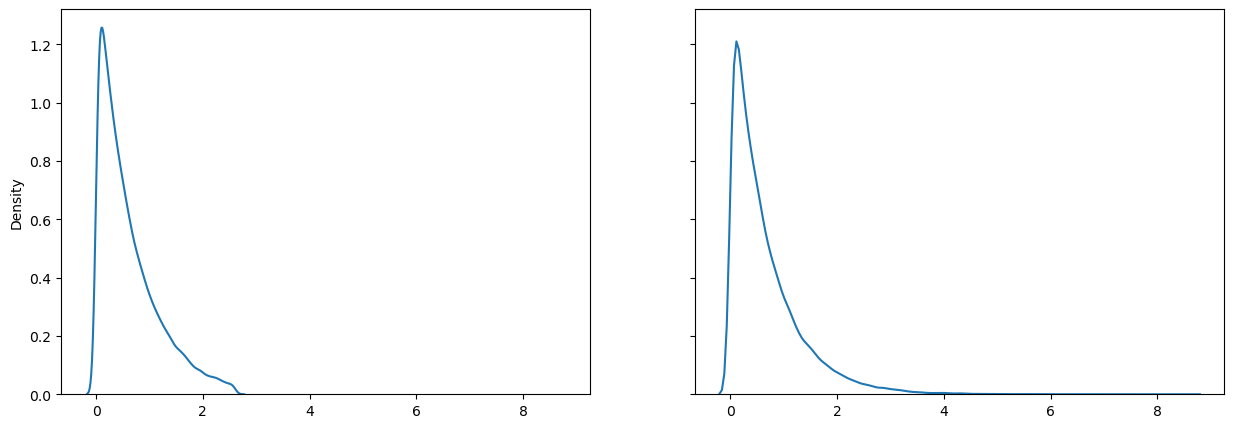

In [100]:
fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(15, 5))

sns.kdeplot(np.random.choice(samples["accept_reject"]["exponential"], size=100000, replace=False), ax=axes[0])
sns.kdeplot(np.random.choice(samples["inverse_cdf"]["exponential"], size=100000, replace=False), ax=axes[1])
plt.show()

In [104]:
samples["accept_reject"]["beta"].max()

0.999999

/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


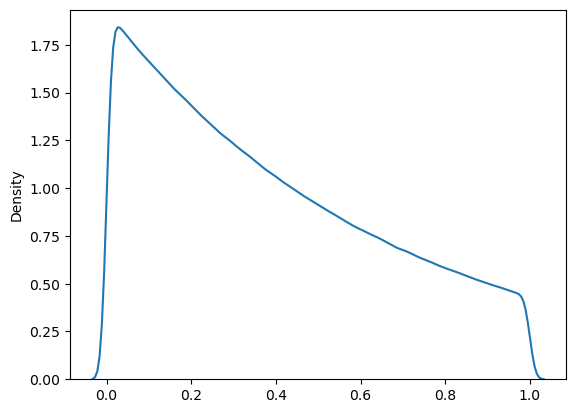

In [111]:
sns.kdeplot(samples["accept_reject"]["beta"])
plt.show()

<BarContainer object of 20 artists>

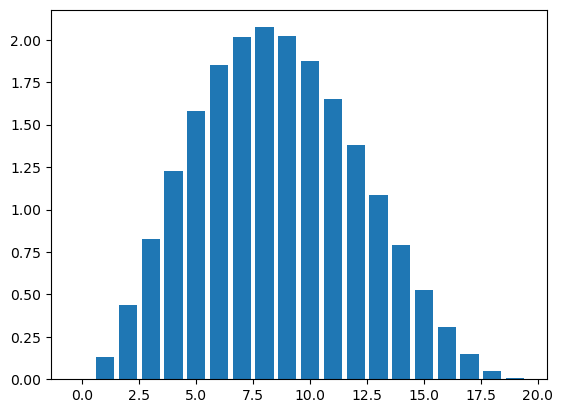

In [107]:
_tmp = [0,0.128606,0.4374,0.829069,1.2288,1.58203,1.8522,2.01849,2.0736,2.02146,1.875,1.65392,1.3824,1.08688,0.7938,0.527344,0.3072,0.146306,0.0486,0.00676875]
plt.bar(x= range(len(_tmp)),height=_tmp)